# EDA WORKFLOW: Canadian Housing Dataset

Data visualization to get a better understanding of the data.

## 1. LOAD cleaned dataset
- Source: Cleaned_HouseListings-Top45Cities.csv
- Format: CSV file with house listings across multiple Canadian provinces
- Preprocessed to remove invalid rows, correct province/city labels, and drop unnecessary columns (e.g., Address)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
data = pd.read_csv("Cleaned_HouseListings-Top45Cities.csv")

# Preview data shape and structure
print("Dataset shape:", data.shape)
print("Column names:", data.columns.tolist())
data.head()

Dataset shape: (32627, 9)
Column names: ['City', 'Price', 'Number_Beds', 'Number_Baths', 'Province', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']


,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,ON,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,ON,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,ON,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,ON,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,ON,5647656,43.7417,-79.3733,97000.0


## 2. VISUALIZE distribution of house prices across provinces
- Helps identify variation in price levels between regions
- Useful for selecting relevant features and understanding market trends


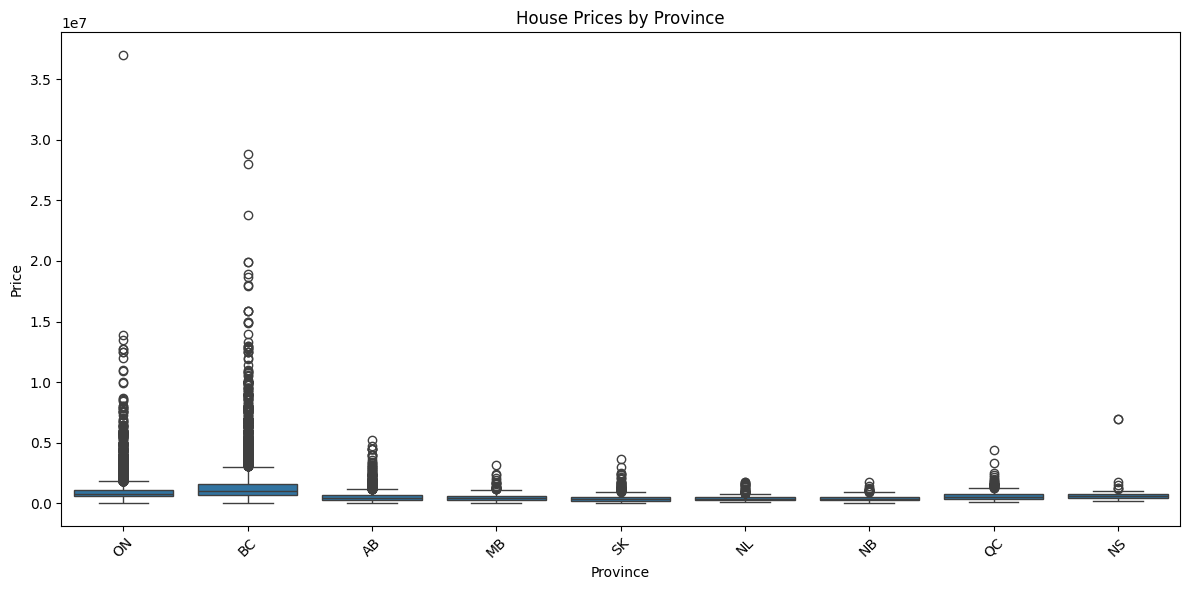

In [2]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Province', y='Price')
plt.xticks(rotation=45)
plt.title('House Prices by Province')
plt.tight_layout()
plt.show()

### Observations: House Prices by Province

The boxplot shows significant variation in housing prices across Canadian provinces:

- **Ontario (ON)** and **British Columbia (BC)** have noticeably higher price distributions, with many high-value outliers.
- Other provinces such as Alberta (AB), Manitoba (MB), and Quebec (QC) display lower and more compact price ranges.
- The wide spread and outliers in ON and BC reflect regional market imbalances and justify the importance of modeling by province.

This visualization supports the decision to include `Province` as a key feature in the predictive model.


## 3. HEATMAP of correlation between numerical features
 - Reveals which variables are most correlated with price (target)
- Key step before model selection and training

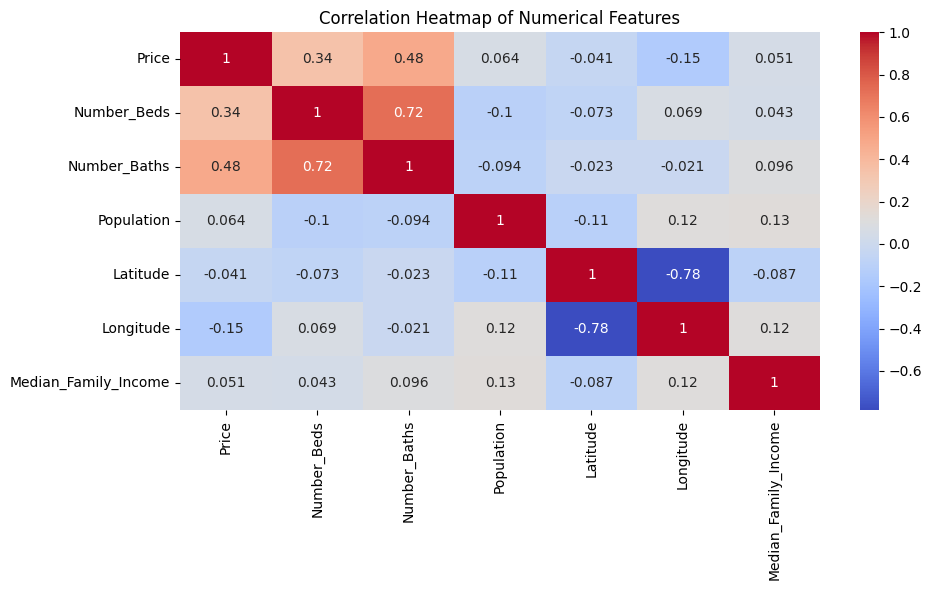

In [3]:
# Set figure size
plt.figure(figsize=(10, 6))

# Compute correlation matrix for all numeric columns
# This auto-selects numeric columns only (e.g., Price, Beds, Baths, Income, etc.)
corr = data.corr(numeric_only=True)

# Plot heatmap of correlations with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add plot title and layout formatting
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Feature Selection Rationale (Based on Correlation Analysis)

The correlation heatmap shows how each numerical feature relates to the target variable `Price`. 

- **`Number_Baths`** and **`Number_Beds`** are the only features with moderate positive correlation to `Price` (**0.48** and **0.34**, respectively), indicating that they can help explain price variation across listings.
- Other variables like `Population`, `Median_Family_Income`, `Latitude`, and `Longitude` show very weak or no linear correlation with `Price`, and are not expected to improve model performance at this stage.

**Conclusion:**  
For the initial predictive model, we will use `Number_Beds` and `Number_Baths` as input features. These are straightforward, interpretable, and most relevant based on the data.

This selection keeps the model focused, reduces complexity, and aligns with the project's goal of building a reliable price prediction tool across Canadian provinces.

## Step 4: Distribution of House Prices (Original Scale)

This histogram shows the overall distribution of house prices across all provinces.  
It helps identify **skewness**, **outliers**, and the general price structure before applying any transformation.

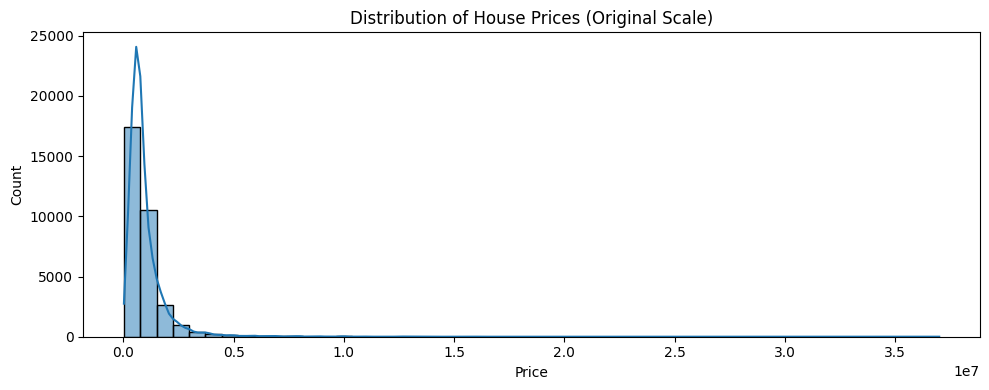

In [5]:
# Set the figure size for the plot
plt.figure(figsize=(10, 4))

# Plot a histogram of the 'Price' variable with 50 bins
# The 'kde=True' adds a Kernel Density Estimate curve to visualize the distribution shape
sns.histplot(data["Price"], bins=50, kde=True)

# Add a descriptive title and axis labels
plt.title("Distribution of House Prices (Original Scale)")
plt.xlabel("Price")
plt.ylabel("Count")

# Optimize layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()

### Observations: Price Distribution

The distribution is highly skewed, with most listings below $1M and a few extreme high-priced properties.

This confirms the need to apply a log transformation to `Price`  
to improve model performance and handle outliers effectively.

## Step 5: Boxplot of House Prices (Log Scale)

This boxplot highlights the presence of **extreme high-priced listings** across all provinces.  
Using a logarithmic scale on the y-axis helps visualize the spread more clearly and confirms the need for log transformation before modeling.

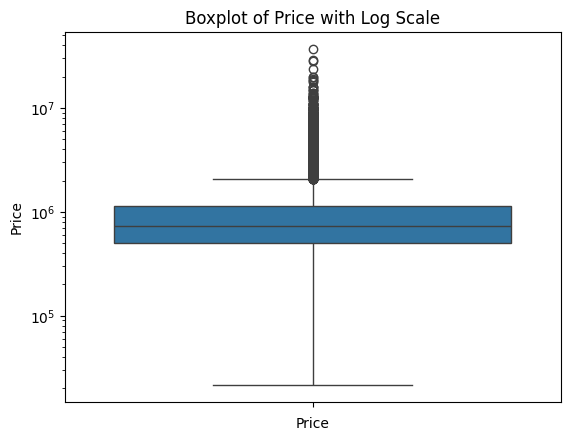

In [6]:
# Create a boxplot to visualize the distribution of house prices
sns.boxplot(data['Price'])

# Label the x-axis
plt.xlabel('Price')

# Apply logarithmic scale to the y-axis to compress large values
plt.yscale('log')

# Add a descriptive title to the plot
plt.title("Boxplot of Price with Log Scale")

# Display the plot
plt.show()

### Observations: Boxplot with Log Scale

The log-scaled boxplot confirms the presence of **extreme outliers** in the price distribution.  
Despite the transformation, a large number of listings remain concentrated in the lower range, reinforcing the decision to log-transform `Price` for modeling.


### Step 6: Distribution of Log-Transformed Prices

This histogram shows the `Price` variable after applying a logarithmic transformation (log10).  
It allows us to assess whether the transformation has successfully normalized the distribution for modeling purposes.

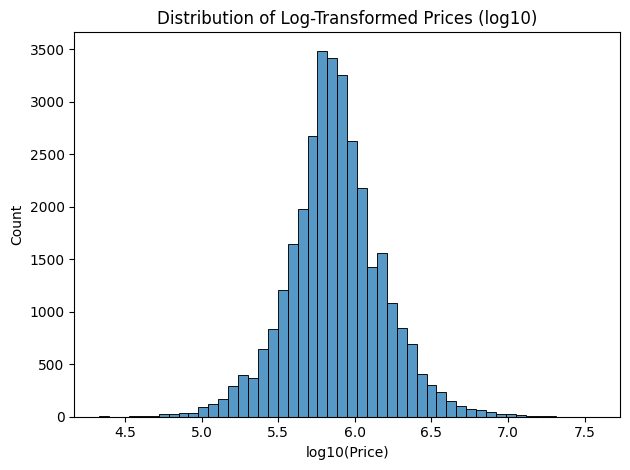

In [9]:
# Plot the distribution of house prices after applying log10 transformation
# This reveals whether the data is more normally distributed for modeling
sns.histplot(np.log10(data["Price"]), bins=50)

# Add a descriptive title and axis labels
plt.title("Distribution of Log-Transformed Prices (log10)")
plt.xlabel("log10(Price)")
plt.ylabel("Count")

# Optimize layout spacing
plt.tight_layout()

# Show the final plot
plt.show()

### Observations: Log-Transformed Price Distribution

The log-transformed price distribution appears **much more symmetric and centered**, resembling a normal distribution.  
This confirms that the logarithmic transformation is effective in reducing skewness and will help improve model performance and stability when predicting house prices across provinces.

### Step 6: Create Log-Transformed Target Variable (`log_price`)

The `Price` variable is highly skewed, which can affect model accuracy.  
To improve prediction and model stability, we apply a `log₁₀` transformation and store it in a new column `log_price`.

This transformed version will be used as the target (`y`) in our regression model.

In [10]:
# Create new target variable using log10 transformation to reduce skewness
data["log_price"] = np.log10(data["Price"])

In [11]:
data.to_csv("Cleaned_HouseListings_with_log_price.csv", index=False)